In [1]:
import numpy as np 
import pandas as pd 
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

from sklearn.linear_model import LinearRegression  
from sklearn.model_selection import train_test_split 
from sklearn import svm  
from sklearn import metrics 

In [2]:
df = pd.read_csv("../Datasets/automobile_prices.csv")

In [3]:
df=df[df["make"] != "ferrari"] # excluding rows where value is 'ferrari'
df.head(5)

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,...,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
1,3,NaN,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111.0,5000.0,21,27,13495
2,3,NaN,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111.0,5000.0,21,27,16500
3,1,NaN,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154.0,5000.0,19,26,16500
4,2,164.0,audi,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102.0,5500.0,24,30,13950
5,2,164.0,audi,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115.0,5500.0,18,22,17450


In [4]:
df.info()

<class 'pandas.DataFrame'>
RangeIndex: 205 entries, 1 to 205
Data columns (total 26 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   symboling          205 non-null    int64  
 1   normalized-losses  164 non-null    float64
 2   make               205 non-null    str    
 3   fuel-type          205 non-null    str    
 4   aspiration         205 non-null    str    
 5   num-of-doors       203 non-null    str    
 6   body-style         205 non-null    str    
 7   drive-wheels       205 non-null    str    
 8   engine-location    205 non-null    str    
 9   wheel-base         205 non-null    float64
 10  length             205 non-null    float64
 11  width              205 non-null    float64
 12  height             205 non-null    float64
 13  curb-weight        205 non-null    int64  
 14  engine-type        205 non-null    str    
 15  num-of-cylinders   205 non-null    str    
 16  engine-size        205 non-null    in

In [5]:
df.shape

(205, 26)

In [6]:
df.describe()

,symboling,normalized-losses,wheel-base,length,width,height,curb-weight,engine-size,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
count,205.000000,164.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,201.000000,201.000000,205.000000,203.000000,203.000000,205.000000,205.000000,205.000000
mean,0.834146,122.000000,98.756585,174.049268,65.907805,53.724878,2555.565854,126.907317,3.329751,3.255423,10.142537,104.256158,5125.369458,25.219512,30.751220,13413.009756
std,1.245307,35.442168,6.021776,12.337289,2.145204,2.443522,520.680204,41.642693,0.273539,0.316717,3.972040,39.714369,479.334560,6.542142,6.886443,8269.458558
min,-2.000000,65.000000,86.600000,141.100000,60.300000,47.800000,1488.000000,61.000000,2.540000,2.070000,7.000000,48.000000,4150.000000,13.000000,16.000000,5118.000000
25%,0.000000,94.000000,94.500000,166.300000,64.100000,52.000000,2145.000000,97.000000,3.150000,3.110000,8.600000,70.000000,4800.000000,19.000000,25.000000,7788.000000
50%,1.000000,115.000000,97.000000,173.200000,65.500000,54.100000,2414.000000,120.000000,3.310000,3.290000,9.000000,95.000000,5200.000000,24.000000,30.000000,10295.000000
75%,2.000000,150.000000,102.400000,183.100000,66.900000,55.500000,2935.000000,141.000000,3.590000,3.410000,9.400000,116.000000,5500.000000,30.000000,34.000000,16503.000000
max,3.000000,256.000000,120.900000,208.100000,72.300000,59.800000,4066.000000,326.000000,3.940000,4.170000,23.000000,288.000000,6600.000000,49.000000,54.000000,45400.000000


In [7]:
df =df[["make", "body-style", "wheel-base", "engine-size", "horsepower", "peak-rpm", "highway-mpg", "price"]]
df

,make,body-style,wheel-base,engine-size,horsepower,peak-rpm,highway-mpg,price
1,alfa-romero,convertible,88.6,130,111.0,5000.0,27,13495
2,alfa-romero,convertible,88.6,130,111.0,5000.0,27,16500
3,alfa-romero,hatchback,94.5,152,154.0,5000.0,26,16500
4,audi,sedan,99.8,109,102.0,5500.0,30,13950
5,audi,sedan,99.4,136,115.0,5500.0,22,17450
...,...,...,...,...,...,...,...,...
201,volvo,sedan,109.1,141,114.0,5400.0,28,16845
202,volvo,sedan,109.1,141,160.0,5300.0,25,19045
203,volvo,sedan,109.1,173,134.0,5500.0,23,21485
204,volvo,sedan,109.1,145,106.0,4800.0,27,22470


In [8]:
df.info()

<class 'pandas.DataFrame'>
RangeIndex: 205 entries, 1 to 205
Data columns (total 8 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   make         205 non-null    str    
 1   body-style   205 non-null    str    
 2   wheel-base   205 non-null    float64
 3   engine-size  205 non-null    int64  
 4   horsepower   203 non-null    float64
 5   peak-rpm     203 non-null    float64
 6   highway-mpg  205 non-null    int64  
 7   price        205 non-null    int64  
dtypes: float64(3), int64(3), str(2)
memory usage: 12.9 KB


In [9]:
df.head()

,make,body-style,wheel-base,engine-size,horsepower,peak-rpm,highway-mpg,price
1,alfa-romero,convertible,88.6,130,111.0,5000.0,27,13495
2,alfa-romero,convertible,88.6,130,111.0,5000.0,27,16500
3,alfa-romero,hatchback,94.5,152,154.0,5000.0,26,16500
4,audi,sedan,99.8,109,102.0,5500.0,30,13950
5,audi,sedan,99.4,136,115.0,5500.0,22,17450


In [10]:
print("Dataframe shape BEFORE removing the Nan")
df.info()

print("\n\nDataframe shape AFTER removing the Nan:")
df = df.dropna(subset=['horsepower', 'peak-rpm'])
df.info()

Dataframe shape BEFORE removing the Nan
<class 'pandas.DataFrame'>
RangeIndex: 205 entries, 1 to 205
Data columns (total 8 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   make         205 non-null    str    
 1   body-style   205 non-null    str    
 2   wheel-base   205 non-null    float64
 3   engine-size  205 non-null    int64  
 4   horsepower   203 non-null    float64
 5   peak-rpm     203 non-null    float64
 6   highway-mpg  205 non-null    int64  
 7   price        205 non-null    int64  
dtypes: float64(3), int64(3), str(2)
memory usage: 12.9 KB


Dataframe shape AFTER removing the Nan:
<class 'pandas.DataFrame'>
Index: 203 entries, 1 to 205
Data columns (total 8 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   make         203 non-null    str    
 1   body-style   203 non-null    str    
 2   wheel-base   203 non-null    float64
 3   engine-size  203 non-null    int64  
 4   h

In [11]:
X = df.drop("price", axis=1)
X

,make,body-style,wheel-base,engine-size,horsepower,peak-rpm,highway-mpg
1,alfa-romero,convertible,88.6,130,111.0,5000.0,27
2,alfa-romero,convertible,88.6,130,111.0,5000.0,27
3,alfa-romero,hatchback,94.5,152,154.0,5000.0,26
4,audi,sedan,99.8,109,102.0,5500.0,30
5,audi,sedan,99.4,136,115.0,5500.0,22
...,...,...,...,...,...,...,...
201,volvo,sedan,109.1,141,114.0,5400.0,28
202,volvo,sedan,109.1,141,160.0,5300.0,25
203,volvo,sedan,109.1,173,134.0,5500.0,23
204,volvo,sedan,109.1,145,106.0,4800.0,27


In [12]:
y = df["price"]
y

1      13495
2      16500
3      16500
4      13950
5      17450
       ...  
201    16845
202    19045
203    21485
204    22470
205    22625
Name: price, Length: 203, dtype: int64

In [13]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [37]:
for a in (X_train, X_test, y_train, y_test):
    print (f"{a.shape} ", end="")

(162, 7) (41, 7) (162,) (41,) 

In [38]:
[a.shape for a in (X_train, X_test, y_train, y_test)] # another way to analyze the shape of test and train DF's

[(162, 7), (41, 7), (162,), (41,)]

In [40]:
%%time
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder

non_numerical_cols = ['make', 'body-style']

transformer = ColumnTransformer(transformers=[('encoder', OneHotEncoder(), non_numerical_cols)],
                               remainder='passthrough') # This specifies that all other columns should be kept

X_encoded = transformer.fit_transform(X)

CPU times: user 4.53 ms, sys: 1.22 ms, total: 5.75 ms
Wall time: 4.77 ms


In [39]:
X_encoded.shape # from 7 to 31 columns(features)

(203, 31)

In [19]:
X_train_encoded, X_test_encoded, y_train, y_test = train_test_split(X_encoded, y, test_size=0.2, random_state=42)

In [41]:
X_train_encoded

<Compressed Sparse Row sparse matrix of dtype 'float64'
	with 1134 stored elements and shape (162, 31)>

In [20]:
X_train_encoded.shape

(162, 31)

In [42]:
%%time

model = LinearRegression()

model.fit(X_train_encoded, y_train)

CPU times: user 4.05 ms, sys: 1.8 ms, total: 5.85 ms
Wall time: 4.16 ms


,"fit_intercept fit_intercept: bool, default=TrueWhether to calculate the intercept for this model. If setto False, no intercept will be used in calculations(i.e. data is expected to be centered).",True
,"copy_X copy_X: bool, default=TrueIf True, X will be copied; else, it may be overwritten.",True
,"tol tol: float, default=1e-6The precision of the solution (`coef_`) is determined by `tol` whichspecifies a different convergence criterion for the `lsqr` solver.`tol` is set as `atol` and `btol` of :func:`scipy.sparse.linalg.lsqr` whenfitting on sparse training data. This parameter has no effect when fittingon dense data... versionadded:: 1.7",1e-06
,"n_jobs n_jobs: int, default=NoneThe number of jobs to use for the computation. This will only providespeedup in case of sufficiently large problems, that is if firstly`n_targets > 1` and secondly `X` is sparse or if `positive` is setto `True`. ``None`` means 1 unless in a:obj:`joblib.parallel_backend` context. ``-1`` means using allprocessors. See :term:`Glossary ` for more details.",None
,"positive positive: bool, default=FalseWhen set to ``True``, forces the coefficients to be positive. Thisoption is only supported for dense arrays.For a comparison between a linear regression model with positive constraintson the regression coefficients and a linear regression without such constraints,see :ref:`sphx_glr_auto_examples_linear_model_plot_nnls.py`... versionadded:: 0.24",False


In [43]:
model.predict(X_train_encoded)[:5] # y_train_hat

array([17546.42519909,  6136.0264417 ,  9296.27146849,  5913.43563204,
        6499.24183762])

In [44]:
y_train[:5]

201    16845
94      7349
39      9095
25      6229
97      7499
Name: price, dtype: int64

In [45]:
y_test_hat = model.predict(X_test_encoded)
y_test_hat[:5]

array([28888.5724148 , 20924.87677112, 14088.92733224,  5303.17515201,
       11750.352832  ])

In [46]:
y_test[:5]

16     30760
10     34587
116    16630
79      6669
67     18344
Name: price, dtype: int64

In [26]:
# Training set - just for curiosity

y_train_hat = model.predict(X_train_encoded)

from sklearn.metrics import mean_absolute_error, r2_score

# calculate MEA score
mae = mean_absolute_error(y_train, y_train_hat)

# calculate R2 score
r2 = r2_score(y_train, y_train_hat)

print(f"mean absolute error  = {mae}")
print(f"r-squared score  = {r2}")

mean absolute error  = 1325.5460575690636
r-squared score  = 0.9536312230947506


In [27]:
from sklearn.metrics import mean_absolute_error, r2_score

# calculate MEA score
mae = mean_absolute_error(y_test, y_test_hat)

# calculate R2 score
r2 = r2_score(y_test, y_test_hat)

print(f"mean absolute error  = {mae}")
print(f"r-squared score  = {r2}")

mean absolute error  = 2482.61476698713
r-squared score  = 0.8316547960358663


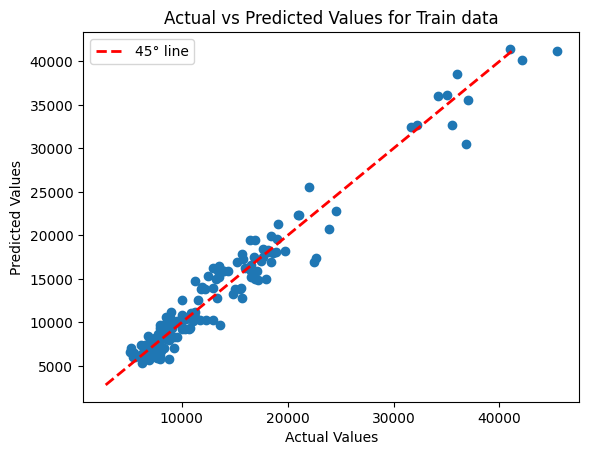

In [48]:
import matplotlib.pyplot as plt

plt.scatter(y_train, y_train_hat)
plt.xlabel("Actual Values")
plt.ylabel("Predicted Values")
plt.title("Actual vs Predicted Values for Train data")

# Add 45-degree line (perfect predictions)
min_val = min(y_test.min(), y_test_hat.min())
max_val = max(y_test.max(), y_test_hat.max())
plt.plot([min_val, max_val], [min_val, max_val], 'r--', linewidth=2, label='45° line')

plt.legend()
plt.show()

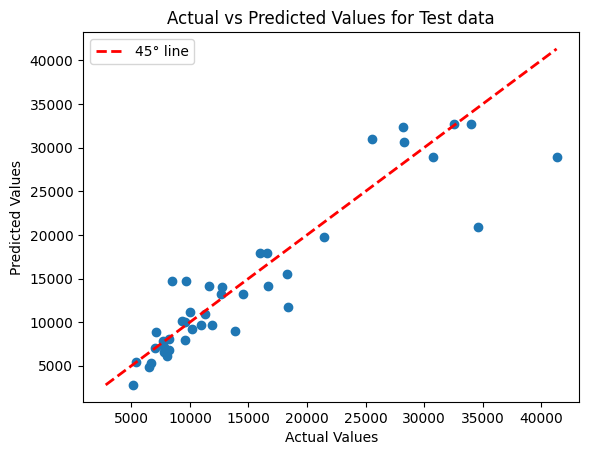

In [47]:
import matplotlib.pyplot as plt

plt.scatter(y_test, y_test_hat)
plt.xlabel("Actual Values")
plt.ylabel("Predicted Values")
plt.title("Actual vs Predicted Values for Test data")

# Add 45-degree line (perfect predictions)
min_val = min(y_test.min(), y_test_hat.min())
max_val = max(y_test.max(), y_test_hat.max())
plt.plot([min_val, max_val], [min_val, max_val], 'r--', linewidth=2, label='45° line')

plt.legend()
plt.show()